**Problem: Can we predict the Quarterback Rating for an nfl quarterback based on data such as int, td, attempts, etc…**

Name: Hao Nyugen(30088094), Isaiah Asaolu(30064020)


**Step 1: Load the dataset**

We will load NFL_QB_Stats from: https://www.kaggle.com/datasets/supremeleaf/nfl-qb-stats-1970-2022?resource=download

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
nfl_df = pd.read_csv('/content/NFL_QB_Stats.csv')
nfl_df

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,1970,Rick Arrington,328,4.5,73,37,50.7,1,3,50.5,0,0.0,0,0,23,2,19
3173,1970,John Stofa,240,4.5,53,16,30.2,3,2,49.2,1,1.9,0,0,52,5,45
3174,1970,Bobby Douglass,218,7.3,30,12,40.0,4,3,65.7,6,20.0,0,0,53,7,46
3175,1970,Mike Livingston,122,5.6,22,11,50.0,0,1,47.9,4,18.2,0,0,31,4,42


In [ ]:
# Check for missing values in each column
nfl_df.isnull().sum().sort_values(ascending=False)

Year        0
Rate        0
Sck         0
Lng         0
40+         0
20+         0
1st%        0
1st         0
INT         0
Player      0
TD          0
Cmp %       0
Cmp         0
Att         0
Yds/Att     0
Pass Yds    0
SckY        0
dtype: int64

In [ ]:
#look at the data shape
print(f"nfl_df size={nfl_df.shape}")
nfl_df.head(5)

nfl_df size=(3177, 17)


,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259


In [ ]:
# Check the data types
nfl_df.dtypes

Year          int64
Player       object
Pass Yds      int64
Yds/Att     float64
Att           int64
Cmp           int64
Cmp %       float64
TD            int64
INT           int64
Rate        float64
1st           int64
1st%        float64
20+           int64
40+           int64
Lng           int64
Sck           int64
SckY          int64
dtype: object

**Step 2: Remove all data from 1970-1999**

We removed all data from 1970-1999 as we believe past quarterbacks' data are uncessary in predicting players in 2023 onwards

In [ ]:
nfl_df = nfl_df[nfl_df['Year'] > 1999]
print(f"size={nfl_df.shape}")

size=(1403, 17)


In [ ]:
nfl_df

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2000,Ray Lucas,206,5.0,41,21,51.2,0,4,26.1,10,24.4,2,0,30,6,24
1399,2000,Spergon Wynn,167,3.1,54,22,40.7,0,1,41.2,5,9.3,1,0,32,13,89
1400,2000,Rick Mirer,126,6.3,20,10,50.0,1,0,86.7,6,30.0,2,0,26,1,6
1401,2000,Jeff Lewis,120,3.8,32,16,50.0,0,1,46.4,6,18.8,0,0,16,7,51


**Step 3: Divide the dataset into features and targets set**

Since we are predicting the quarterback rating. We will using the rating as targets, and the other data will be features. In addition, we also dropped:
- Player's name
- The year they play

In [ ]:
X = nfl_df.drop(columns=['Rate','Player', 'Year'])
y = nfl_df['Rate']
X

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,1st,1st%,20+,40+,Lng,Sck,SckY
0,5250,8.1,648,435,67.1,41,12,272,42.0,73,13,67,26,188
1,4739,6.8,699,477,68.2,25,10,228,32.6,50,7,55,38,206
2,4694,6.4,733,490,66.8,25,9,237,32.3,50,8,63,22,160
3,4547,7.1,643,424,65.9,29,14,230,35.8,47,10,66,46,329
4,4475,7.4,606,414,68.3,35,12,219,36.1,53,10,60,41,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,206,5.0,41,21,51.2,0,4,10,24.4,2,0,30,6,24
1399,167,3.1,54,22,40.7,0,1,5,9.3,1,0,32,13,89
1400,126,6.3,20,10,50.0,1,0,6,30.0,2,0,26,1,6
1401,120,3.8,32,16,50.0,0,1,6,18.8,0,0,16,7,51


In [ ]:
# Split the datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=42)

**Step 4: Ridge Regression**

We will use Ridge Regression as the first model for the dataset.

We used StandardScaler- This step is important to ensure that features have a mean of 0 and a standard deviation of 1. This is important becasue in the NFL dataset, features min and max values varies siginigcantly depending on the column. For example, yards can be 5000plus and Interceptions can be 0-5
Using StandardScaler helps the Ridge regression model converge faster.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the preprocessing steps
preprocessor = StandardScaler()

# Define the Ridge regression model
model = Ridge(alpha=0.1)

# Create the pipeline
ridge_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', model)
])

# Define parameter grids
param_grid_ridge = {
    'classifier__alpha': [0, 0.1,0.2,0.5, 1, 10]
  }


# Implement grid search
from sklearn.model_selection import GridSearchCV, cross_val_score
grid_search_ridge = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, return_train_score= True)

# Fit the model using the grid_search
grid_search_ridge.fit(X_train, y_train)

# TODO: Print the results from the grid search

print("Ridge Regression Results:")
best_params_lr = grid_search_ridge.best_params_
print(f'Best paramter: {best_params_lr}')
print("Best cross-validation train score: {:.2f}".format(grid_search_ridge.cv_results_['mean_train_score'][grid_search_ridge.best_index_]))
print(f'Best Cross-Validation test score: {grid_search_ridge.best_score_:.2f}')
print(f'Test-set score: {grid_search_ridge.score(X_test, y_test):.2f}')

Ridge Regression Results:
Best paramter: {'classifier__alpha': 0.5}
Best cross-validation train score: 0.84
Best Cross-Validation test score: 0.83
Test-set score: 0.83


**Obseveration for Ridge Regreession**

* Initially, we experimented with a subset of features, which excluded 'Yds/Att', 'Att', 'Cmp', '20+', and '40+'. However, when we included more features from the dataset, we observed a noticeable improvement in the test score, indicating to us the importance of feature selection in improving model performance.

* Next, we initially expected the best alpha value would be the largest value, but this wasnm't the result of our experiment. We found the best alpha to 0.1 whne the range was 0 to 1. Upon further tuning, we found the a regularization parameter of 0.5 yield the best test score.
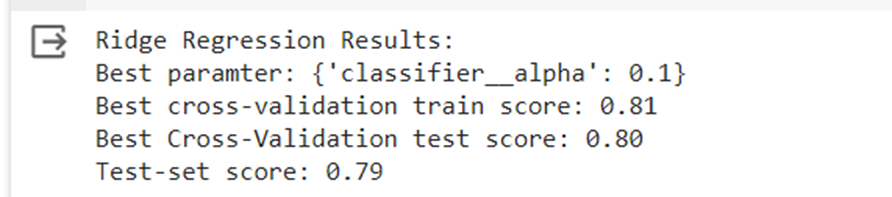

**Step 5: Random Forest Regression**

We will use Random Forest Regression as the second model for the dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regression model
random_forest = RandomForestRegressor(random_state=0)

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', random_forest)
])

# Define parameter grids
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth' : [1, 3, 5, 10, 30],
    'regressor__max_features' : [7, 9, 11, 20, 30]
}

# Implement grid search
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, return_train_score = True)
grid_search_rf.fit(X_train, y_train)

# Print the result from the grid search
print("Random Forest Regression Results:")
print(f"Best parameter: {grid_search_rf.best_params_}")
print("Best cross-validation train score: {:.2f}".format(grid_search_rf.cv_results_['mean_train_score'][grid_search_rf.best_index_]))
print(f"Best Cross-Validation test score: {grid_search_rf.best_score_:.2f}")
print(f"Test-set score: {grid_search_rf.score(X_test, y_test):.2f}")

Random Forest Regression Results:
Best parameter: {'regressor__max_depth': 30, 'regressor__max_features': 20, 'regressor__n_estimators': 300}
Best cross-validation train score: 0.99
Best Cross-Validation test score: 0.89
Test-set score: 0.83


**Observation for Random Forest Regression**

- At first the best parameters was n_estimators = 300, max_depth = 10, and max_features = 11 which produces low test-set score of 0.81
- However, when we introduced new parameters such as max_depth = 30, max_features = 20, and max_features = 30, the scores slightly increase


**Step 6: Support Vector Machine**

We will use Support Vector Regression as the third model for the dataset

In [ ]:
from sklearn.svm import SVR

# Define the SVR Forest Regression model
svm_model = SVR()
from sklearn.metrics import mean_squared_error


# Create the pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', svm_model)
])

# param_grid_svm = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
param_grid_svm = {
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__C': [10, 11, 15, 20, 25, 40],
    'regressor__gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, return_train_score = True)
grid_search_svm.fit(X_train, y_train)

# Print the result from the grid search
print("SVM Results:")
print(f"Best parameter: {grid_search_svm.best_params_}")
print("Best cross-validation train score: {:.2f}".format(grid_search_svm.cv_results_['mean_train_score'][grid_search_svm.best_index_]))
print(f"Best Cross-Validation test score: {grid_search_svm.best_score_:.2f}")
print(f"Test-set score: {grid_search_svm.score(X_test, y_test):.2f}")


SVM Results:
Best parameter: {'regressor__C': 40, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}
Best cross-validation train score: 0.94
Best Cross-Validation test score: 0.90
Test-set score: 0.97


**obseveration for SVM**

* Initially, when the grid search ranged from C=10 to C=40, there was significant improvements in both cross-validation and test scores were observed. However, when the paramater was extended to higher values, such as C=100, marginal improvements were noticed.

* when C=100, the cross-validation score had a modest increase of 2 percentage points, while the test score saw a minor improvement of 1 percentage point.

* Although our dataset is small, so this doesn't matter as such, but when we consider the computational cost, the increase in C from 40 to 100 might not be justifiable.

* Therefore, we concluded that for our task, C=100 is not be worth it, especially when the model already achieves a high test score of 0.97 with C=40

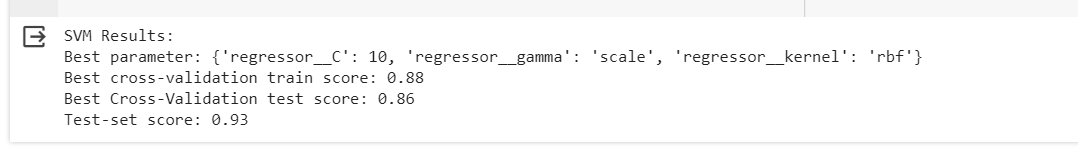
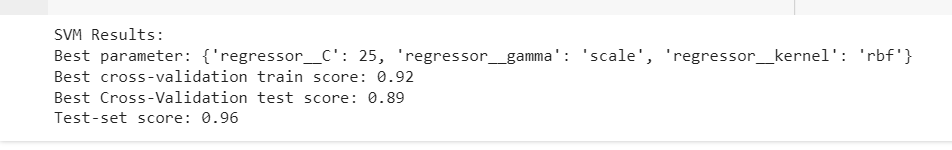

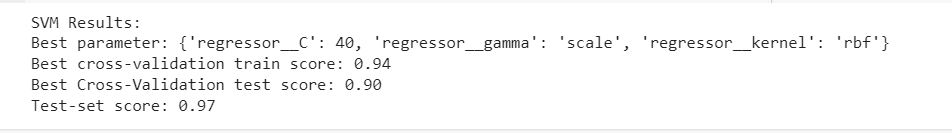
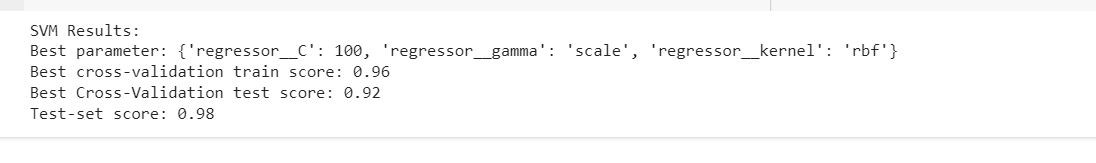

**Step 7: Observation of the three models**

After running the dataset through Ridge Regression, Random Forest Regression, and Support Vector Machines, we found that:
- The best model for the dataset was Support Vector Machine. The best parameter was C = 40, gamma = 'scale', and kernel = 'rbf'
- We believe this model is a good fit for the dataset as it has low variance and low bias, it also has high score when testing on the test set
- Out of the three grid search models, we found that Random Forest Regression took the longest (around 5 minutes) because the model has a lot of parameters to search through
- Throughout the project, we improved the models' performance by expanding the range of values in the parameter grid